<a href="https://colab.research.google.com/github/marsznatalia/PUMproject/blob/main/PUMproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
!pip install requests

In [17]:
import requests

def download_from_github(repo_owner, repo_name, file_path):
    url = f"https://raw.githubusercontent.com/{repo_owner}/{repo_name}/main/{file_path}"
    response = requests.get(url)
    response.raise_for_status()
    return response.text

repo_owner = "marsznatalia"
repo_name = "PUMproject"
file_path_on_github = "diabetics_data.csv"

try:
    file_content = download_from_github(repo_owner, repo_name, file_path_on_github)
    with open("diabetics_data.csv", "w") as f:
        f.write(file_content)
    df = pd.read_csv("diabetics_data.csv", header = None, sep=";")
    print("First 5 records:", df.head())


except requests.exceptions.RequestException as e:
    print(f"Error downloading file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

try:

    df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesFunction', 'Age', 'Outcome']

    print("First 5 records with headers:\n", df.head())

except FileNotFoundError:
    print("Error: 'downloaded_data.csv' not found. Make sure the file exists and the path is correct.")
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

First 5 records:    0    1   2   3    4     5      6     7    8
0  6  148  72  35    0  33.6  0.627  50.0  Yes
1  1   85  66  29    0  26.6  0.351  31.0   No
2  8  183  64   0    0  23.3  0.672  32.0  Yes
3  1   89  66  23   94  28.1  0.167  21.0   No
4  0  137  40  35  168  43.1  2.288  33.0  Yes
First 5 records with headers:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesFunction   Age Outcome  
0             0.627  50.0     Yes  
1             0.351  31.0      No  
2             0.672  32.0     Yes  
3             0.167  21.0      No  
4             2.288  33.0     Yes  


Zbuduj model, którego celem będzie klasyfikacja czy dana osoba ma cukrzycę

Cukrzycowa baza danych Indian Pima:

źródło danych: National Institute of Diabetes and Digestive and

Research Center, RMI Group Leader, Applied Physics Laboratory. The Johns Hopkins University

Liczba instancji: 768

Liczba atrybutów: 8 plus klasa

Lista atrybutów (kolejnosc w pliku)

1. Liczba przypadków ciąży
2. Stężenie glukozy w osoczu po 2 godzinach w doustnym teście tolerancji glukozy
3. Rozkurczowe ciśnienie krwi (mm Hg)
4. Grubość fałdu skórnego tricepsa (mm)
5. 2-godzinne stężenie insuliny w surowicy (mu U/ml)
6. Wskaźnik masy ciała (waga w kg/(wzrost w m)^2)
7. Funkcja rodowodu cukrzycy
8. Wiek (lata)
9. Czy zdiagnozowano cukrzyce

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesFunction  768 non-null    float64
 7   Age               765 non-null    float64
 8   Outcome           768 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 54.1+ KB


In [21]:
le = LabelEncoder()

for column in ['Outcome']:
  if column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesFunction   Age  Outcome  
0             0.627  50.0        1  
1             0.351  31.0        0  
2             0.672  32.0        1  
3             0.167  21.0        0  
4             2.288  33.0        1  


In [22]:
df.dropna(inplace=True)
y = df['Outcome']
X = df.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [24]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 63.68
Coefficient of determination: -288.79


In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs:.2f}")

Mean Squared Error (MSE): 63.68
Mean Absolute Error (MAE): 0.86
Explained Variance Score: -287.39


                  Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies          1.000000  0.100599       0.074648       0.000966   
Glucose              0.100599  1.000000       0.153298       0.059170   
BloodPressure        0.074648  0.153298       1.000000       0.207676   
SkinThickness        0.000966  0.059170       0.207676       1.000000   
Insulin             -0.026318  0.332189       0.090345       0.436989   
BMI                  0.044794  0.222845       0.283099       0.391183   
DiabetesFunction     0.001549  0.138273       0.040504       0.182137   
Age                  0.034376 -0.003843      -0.126726      -0.047805   
Outcome              0.153558  0.468646       0.064083       0.072611   

                   Insulin       BMI  DiabetesFunction       Age   Outcome  
Pregnancies      -0.026318  0.044794          0.001549  0.034376  0.153558  
Glucose           0.332189  0.222845          0.138273 -0.003843  0.468646  
BloodPressure     0.090345  0.283099  

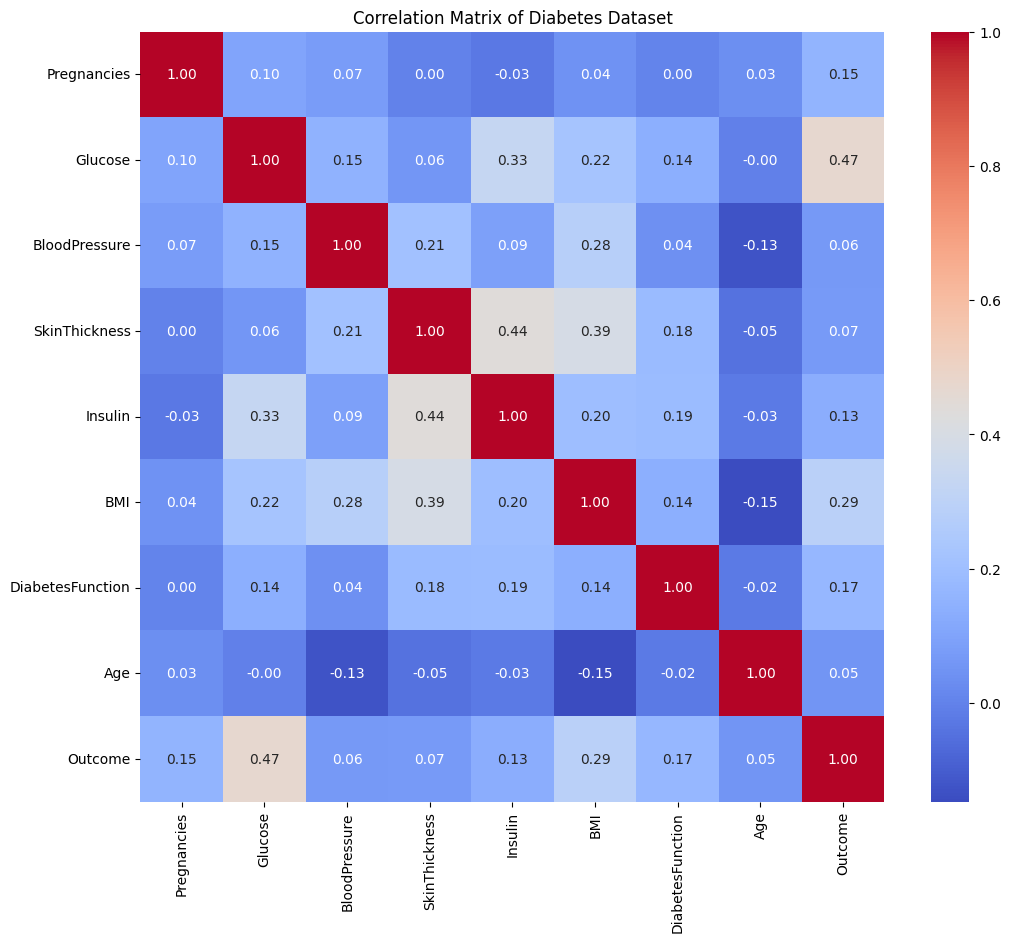

In [31]:
correlation_matrix = df.corr()

print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()